# Load Data 

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

X_train = np.load('data/X_train.npy')
X_test = np.load('data/X_test.npy')
y_train = np.load('data/y_train.npy')
y_test = np.load('data/y_test.npy')
train_y = np.load('data/train_y.npy')
test_y = np.load('data/test_y.npy')
max_length = int(np.load('data/max.npy'))

# LSTM 

In [28]:
from keras.layers import LSTM
from keras import optimizers
from keras import layers
from keras import models


model = models.Sequential()
model.add(LSTM(1, input_shape = (max_length, X_train.shape[-1])))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=.001),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(X_train, y_train , epochs=10, batch_size=64, validation_split=0.10)

Train on 135 samples, validate on 15 samples
Epoch 1/10
135/135 [==============================] - 7s 54ms/step - loss: 0.7068 - acc: 0.4667 - val_loss: 0.7013 - val_acc: 0.4667
Epoch 2/10
135/135 [==============================] - 6s 45ms/step - loss: 0.7060 - acc: 0.4593 - val_loss: 0.7012 - val_acc: 0.4667
Epoch 3/10
135/135 [==============================] - 6s 45ms/step - loss: 0.7056 - acc: 0.4667 - val_loss: 0.7012 - val_acc: 0.4667
Epoch 4/10
135/135 [==============================] - 6s 45ms/step - loss: 0.7053 - acc: 0.4667 - val_loss: 0.7012 - val_acc: 0.4667
Epoch 5/10
135/135 [==============================] - 6s 45ms/step - loss: 0.7051 - acc: 0.4667 - val_loss: 0.7012 - val_acc: 0.4667
Epoch 6/10
135/135 [==============================] - 6s 45ms/step - loss: 0.7048 - acc: 0.4667 - val_loss: 0.7012 - val_acc: 0.4667
Epoch 7/10
135/135 [==============================] - 6s 45ms/step - loss: 0.7044 - acc: 0.4741 - val_loss: 0.7013 - val_acc: 0.4667
Epoch 8/10
135/135 [====

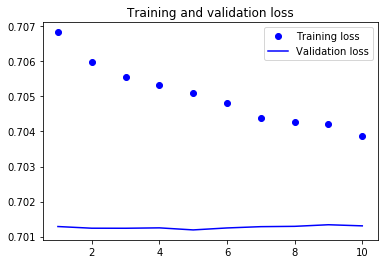

In [29]:
### Plot Losss
def plot_loss():
    acc = history.history['acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

plot_loss()

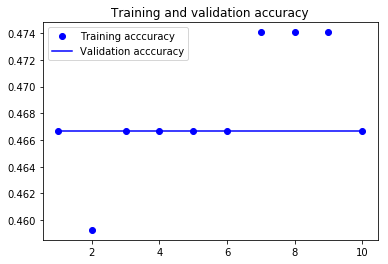

In [30]:
### Plot accuracy 

def plot_accuracy():
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    epochs = range(1, len(acc) + 1)
    plt.figure()
    plt.plot(epochs, acc, 'bo', label='Training acccuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation acccuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()
    
plot_accuracy()

# Bidirectional LSTM

In [31]:
from keras.layers import Bidirectional

model = models.Sequential()
model.add(Bidirectional(LSTM(1), input_shape = (max_length, X_train.shape[-1])))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=.001),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(X_train, y_train , epochs=10, batch_size=64, validation_split=0.10)

Train on 135 samples, validate on 15 samples
Epoch 1/10
135/135 [==============================] - 13s 98ms/step - loss: 0.6986 - acc: 0.5037 - val_loss: 0.6932 - val_acc: 0.4667
Epoch 2/10
135/135 [==============================] - 11s 84ms/step - loss: 0.6976 - acc: 0.5333 - val_loss: 0.6936 - val_acc: 0.5333
Epoch 3/10
135/135 [==============================] - 11s 85ms/step - loss: 0.6971 - acc: 0.5333 - val_loss: 0.6937 - val_acc: 0.4667
Epoch 4/10
135/135 [==============================] - 11s 85ms/step - loss: 0.6969 - acc: 0.5259 - val_loss: 0.6936 - val_acc: 0.5333
Epoch 5/10
135/135 [==============================] - 11s 85ms/step - loss: 0.6969 - acc: 0.5259 - val_loss: 0.6936 - val_acc: 0.5333
Epoch 6/10
135/135 [==============================] - 11s 85ms/step - loss: 0.6970 - acc: 0.5333 - val_loss: 0.6935 - val_acc: 0.4667
Epoch 7/10
135/135 [==============================] - 11s 84ms/step - loss: 0.6969 - acc: 0.5333 - val_loss: 0.6935 - val_acc: 0.4667
Epoch 8/10
135/13

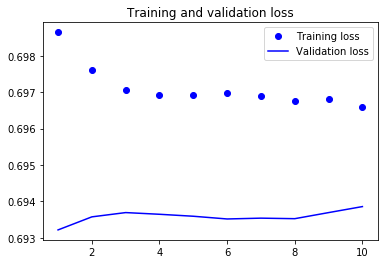

In [32]:
plot_loss()

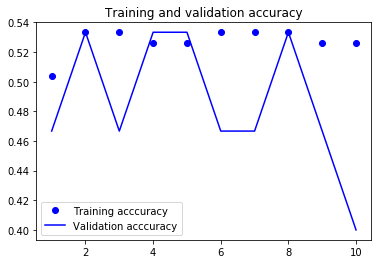

In [33]:
plot_accuracy()